# PageRank without Teleporting

In [1]:
% matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
M = np.array([[0, 1/2, 1, 0],
              [1/3, 0, 0, 1/2],
              [1/3, 0 ,0 ,1/2],
              [1/3, 1/2, 0, 0]])

The following code shows the transition from node B to all other nodes of the network.

In [3]:
np.dot(M, np.array([[0],
              [1],
              [0],
              [0]]))

array([[ 0.5],
       [ 0. ],
       [ 0. ],
       [ 0.5]])

The following code computes PageRank (version 1).

In [4]:
PR = np.array([[1/4],
               [1/4],
               [1/4],
               [1/4]])

In [5]:
PR = np.dot(M,PR)
PR

array([[ 0.375     ],
       [ 0.20833333],
       [ 0.20833333],
       [ 0.20833333]])

In [6]:
PR = np.dot(M,PR)
PR

array([[ 0.3125    ],
       [ 0.22916667],
       [ 0.22916667],
       [ 0.22916667]])

In [7]:
PR = np.dot(M,PR)
PR

array([[ 0.34375],
       [ 0.21875],
       [ 0.21875],
       [ 0.21875]])

And so on. How long does it take to reach a stationary value?

PR after 12 iterations:
[[ 0.33331299]
 [ 0.222229  ]
 [ 0.222229  ]
 [ 0.222229  ]]


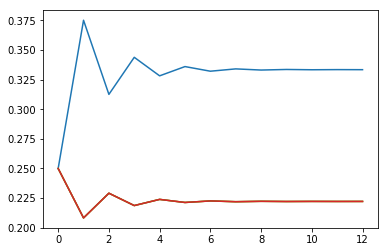

In [8]:
epsylon = 0.0001
PR = np.array([[1/4],
               [1/4],
               [1/4],
               [1/4]])
iterations = 0
oldPR = np.zeros((4,1))
allPR = [PR]
while max(np.abs(oldPR-PR)) > epsylon:
    oldPR = PR
    PR = np.dot(M, PR)
    allPR.append(PR)
    iterations += 1
print("PR after %i iterations:" % iterations)
print(PR)
for p in range(4):
    data = [onePR[p,0] for onePR in allPR]
    plt.plot(data)

## PageRank with a dead end

In [9]:
M = np.array([[0, 1/2, 0, 0],
              [1/3, 0, 0, 1/2],
              [1/3, 0 ,0 ,1/2],
              [1/3, 1/2, 0, 0]])

PR after 22 iterations:
[[ 0.00018015]
 [ 0.00026256]
 [ 0.00026256]
 [ 0.00026256]]


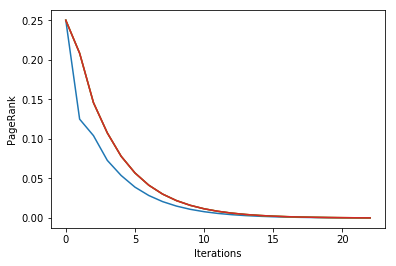

In [11]:
epsylon = 0.0001
PR = np.array([[1/4],
               [1/4],
               [1/4],
               [1/4]])
iterations = 0
oldPR = np.zeros((4,1))
allPR = [PR]
while max(np.abs(oldPR-PR)) > epsylon:
    oldPR = PR
    PR = np.dot(M, PR)
    allPR.append(PR)
    iterations += 1
print("PR after %i iterations:" % iterations)
print(PR)
for p in range(4):
    data = [onePR[p,0] for onePR in allPR]
    plt.plot(data)
plt.xlabel("Iterations")
plt.ylabel("PageRank")

## Computing PageRank on a reduced strongly connected network
The following transition matrix features dead end at node $E$ which needs to be removed.

In [12]:
M = np.array([[0,  1/2, 0,  0, 0],
              [1/3,  0, 0,1/2, 0],
              [1/3,  0, 0,1/2, 0],
              [1/3,1/2, 0,  0, 0],
              [0,    0, 1,  0, 0]])

The resulting transition matrix has now a dead end at node $C$, which also needs to be removed.

In [13]:
M = np.array([[0,  1/2, 0,  0],
              [1/3,  0, 0,1/2],
              [1/3,  0, 0,1/2],
              [1/3,1/2, 0,  0]])

The resulting transition matrix after removing node $C$ is strongly connected. 

In [21]:
M = np.array([[0,  1/2,  0],
              [1/2,  0,  1],
              [1/2,1/2,  0]])

Now we can compute PageRank:

PR after 12 iterations:
[[ 0.22224935]
 [ 0.44441732]
 [ 0.33333333]]


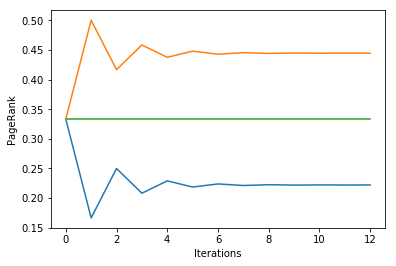

In [22]:
epsylon = 0.0001
PR = np.array([[1/3],
               [1/3],
               [1/3]])
iterations = 0
oldPR = np.zeros((3,1))
allPR = [PR]
while max(np.abs(oldPR-PR)) > epsylon:
    oldPR = PR
    PR = np.dot(M, PR)
    allPR.append(PR)
    iterations += 1
print("PR after %i iterations:" % iterations)
print(PR)
for p in range(3):
    data = [onePR[p,0] for onePR in allPR]
    plt.plot(data)
plt.xlabel("Iterations")
plt.ylabel("PageRank")

And we can now compute the remaining PageRank scores:

In [24]:
C = PR[0,0]/3 + PR[2,0]/2
print("PR(C) = ", C)

PR(C) =  0.240749782986


In [25]:
E = C
print("PR(E) = ", E)

PR(E) =  0.240749782986


## A one-node spider trap

In [26]:
M = np.array([[0,  1/2, 0,  0],
              [1/3,  0, 0,1/2],
              [1/3,  0, 1,1/2],
              [1/3,1/2, 0,  0]])

PR after 26 iterations:
[[  5.08006382e-05]
 [  7.40382271e-05]
 [  9.99801123e-01]
 [  7.40382271e-05]]


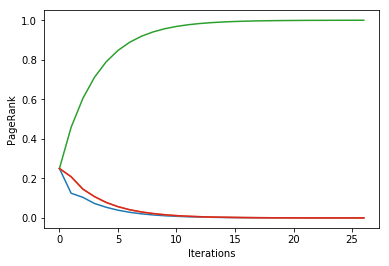

In [27]:
epsylon = 0.0001
PR = np.array([[1/4],
               [1/4],
               [1/4],
               [1/4]])
iterations = 0
oldPR = np.zeros((4,1))
allPR = [PR]
while max(np.abs(oldPR-PR)) > epsylon:
    oldPR = PR
    PR = np.dot(M, PR)
    allPR.append(PR)
    iterations += 1
print("PR after %i iterations:" % iterations)
print(PR)
for p in range(4):
    data = [onePR[p,0] for onePR in allPR]
    plt.plot(data)
plt.xlabel("Iterations")
plt.ylabel("PageRank")

# PageRank with Teleporting

## This network has dead ends

In [28]:
M = np.array([[0, 1/2, 0, 0],
              [1/3, 0, 0, 1/2],
              [1/3, 0 ,0 ,1/2],
              [1/3, 1/2, 0, 0]])

PR after 15 iterations:
[[ 0.08258051]
 [ 0.10599353]
 [ 0.10599353]
 [ 0.10599353]]


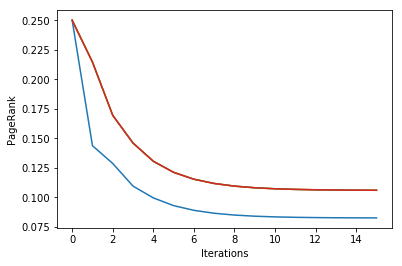

In [31]:
epsylon = 0.0001
beta = 0.85
PR = np.array([[1/4],
               [1/4],
               [1/4],
               [1/4]])
iterations = 0
oldPR = np.zeros((4,1))
allPR = [PR]
while max(np.abs(oldPR-PR)) > epsylon:
    oldPR = PR
    PR = beta*(np.dot(M, PR)) + (1-beta)/4*np.ones((4,1))
    allPR.append(PR)
    iterations += 1
print("PR after %i iterations:" % iterations)
print(PR)
for p in range(4):
    data = [onePR[p,0] for onePR in allPR]
    plt.plot(data)
plt.xlabel("Iterations")
plt.ylabel("PageRank")

## This network has a one-node spider trap

In [32]:
M = np.array([[0,  1/2, 0,  0],
              [1/3,  0, 0,1/2],
              [1/3,  0, 1,1/2],
              [1/3,1/2, 0,  0]])

PR after 17 iterations:
[[ 0.08252665]
 [ 0.10591504]
 [ 0.70564327]
 [ 0.10591504]]


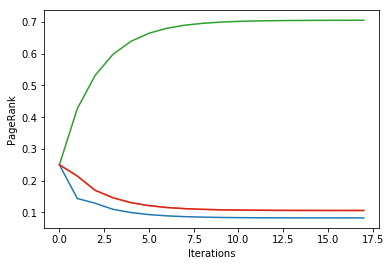

In [33]:
epsylon = 0.0001
beta = 0.85
PR = np.array([[1/4],
               [1/4],
               [1/4],
               [1/4]])
iterations = 0
oldPR = np.zeros((4,1))
allPR = [PR]
while max(np.abs(oldPR-PR)) > epsylon:
    oldPR = PR
    PR = beta*(np.dot(M, PR)) + (1-beta)/4*np.ones((4,1))
    allPR.append(PR)
    iterations += 1
print("PR after %i iterations:" % iterations)
print(PR)
for p in range(4):
    data = [onePR[p,0] for onePR in allPR]
    plt.plot(data)
plt.xlabel("Iterations")
plt.ylabel("PageRank")